In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("talk")

from taskcode import plotting

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

### 60 Min Chunks

Select algorithm had good results from random forests and gradient boosting when looking at a very clean subset of the data.

By chunking into hour long tasks and using only events with at least one point per minute and using all generated features, we get good accuracy, but can only really train on a subset of tasks:

```
         f1: 0.81
   Accuracy: 0.82

Confusion Matrix:
[[ 0.33  0.67  0.    0.    0.  ]
 [ 0.    0.94  0.06  0.    0.  ]
 [ 0.    0.33  0.67  0.    0.  ]
 [ 0.    0.    0.    1.    0.  ]
 [ 0.    0.    0.    0.    1.  ]]
```

From the learning curve below we see that this probably won't improve drastically with more training examples, it has started to level off.

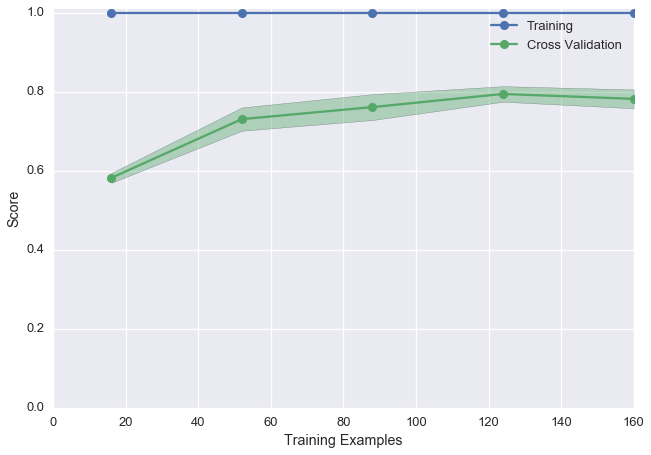

In [2]:
from taskcode import construct

classifier = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                max_depth=6, max_features=23, max_leaf_nodes=None,
                min_samples_leaf=1, min_samples_split=2,
                min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                oob_score=False, random_state=None, verbose=0,
                warm_start=False)

df = construct.load_tasks(cache=True, interval='1h')
df[df.isnull()] = 0.0

# Short term, use only tasks with more than 10 examples 
labels_above_ten = df.label.groupby(df.label).count() > 10
labels_above_ten = labels_above_ten[labels_above_ten].index
df = df[df.label.isin(labels_above_ten)]
X = df.iloc[:,4:].astype(float)
y = df.label.values.astype(int)

fig, ax = plt.subplots()
plt.ylim(0,1.01)
plotting.learning_curve_band(classifier, X, y, ax=ax)
plt.legend(loc='best')
plt.show()

### 30 Min Chunks

If we reduce the chunk size to 30, we get quite a few more examples to use. (More likely to have continuously good data and more chunks in general.) Then we can train on a much longer list of tasks, with reasonable accuracy:

```
         f1: 0.68
   Accuracy: 0.70

Confusion Matrix:
[[ 0.65  0.29  0.    0.06  0.    0.    0.    0.    0.  ]
 [ 0.02  0.87  0.04  0.06  0.    0.    0.    0.    0.  ]
 [ 0.07  0.53  0.07  0.27  0.    0.    0.    0.07  0.  ]
 [ 0.09  0.14  0.05  0.73  0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    1.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    1.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.25  0.    0.5   0.    0.25]
 [ 0.    0.    0.    0.    0.    0.    0.    0.8   0.2 ]
 [ 0.    0.08  0.    0.    0.    0.    0.    0.62  0.31]]
 ```
 
And in the learning curve below we see that we might expect some improvement with additional training data. With this many classes though it is likely to not have as high of a final accuracy.

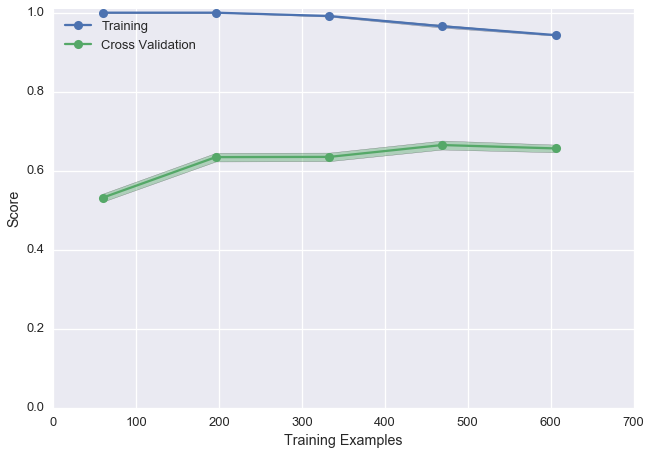

In [3]:
from taskcode import construct

classifier = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                max_depth=6, max_features=23, max_leaf_nodes=None,
                min_samples_leaf=1, min_samples_split=2,
                min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                oob_score=False, random_state=None, verbose=0,
                warm_start=False)

df = construct.load_tasks(cache=True, interval='30m')
df[df.isnull()] = 0.0

# Short term, use only tasks with more than 10 examples 
labels_above_ten = df.label.groupby(df.label).count() > 10
labels_above_ten = labels_above_ten[labels_above_ten].index
df = df[df.label.isin(labels_above_ten)]
X = df.iloc[:,4:].astype(float)
y = df.label.values.astype(int)

fig, ax = plt.subplots()
plt.ylim(0,1.01)
plotting.learning_curve_band(classifier, X, y, ax=ax)
plt.legend(loc='best')
plt.show()